## FAO FDI (World Bank Open Data) - End-to-End Data Science Project
This repository showcases a complete data science workflow using FAO Foreign Direct Investment (FDI) inflows to agriculture, Forestry, and Fishing, sourced from World Bank Open Data. The objective is to demonstrate data cleaning, exploratory data analysis (EDA), visualisation, insights, and a simple machine-learning application.

## Project Objectives
- Clean and structure a real-world public dataset.
- Perform exploratory data analysis (EDA).
- Visualisations.
- Extract meaningful insights.
- Apply an interpretable machine-learning model.
- Conclusion.

# Import Libraries & Setup

In [8]:
# Core data handling
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading Data

In [9]:
# Load the data
df = pd.read_csv("FAO_FDI.csv")

# Preview the dataset
df.head()

,STRUCTURE,STRUCTURE_ID,ACTION,FREQ,FREQ_LABEL,REF_AREA,REF_AREA_LABEL,INDICATOR,INDICATOR_LABEL,SEX,...,UNIT_MULT,UNIT_MULT_LABEL,UNIT_TYPE,UNIT_TYPE_LABEL,TIME_FORMAT,TIME_FORMAT_LABEL,OBS_STATUS,OBS_STATUS_LABEL,OBS_CONF,OBS_CONF_LABEL
0,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,ALB,Albania,FAO_FDI_23080,"FDI inflows to Agriculture, Forestry and Fishing",_T,...,6,Millions,NUMBER,Number (real number),602,CCYY,A,Normal value,PU,Public
1,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,ALB,Albania,FAO_FDI_23080,"FDI inflows to Agriculture, Forestry and Fishing",_T,...,6,Millions,NUMBER,Number (real number),602,CCYY,A,Normal value,PU,Public
2,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,ALB,Albania,FAO_FDI_23080,"FDI inflows to Agriculture, Forestry and Fishing",_T,...,6,Millions,NUMBER,Number (real number),602,CCYY,A,Normal value,PU,Public
3,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,ALB,Albania,FAO_FDI_23080,"FDI inflows to Agriculture, Forestry and Fishing",_T,...,6,Millions,NUMBER,Number (real number),602,CCYY,A,Normal value,PU,Public
4,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,ALB,Albania,FAO_FDI_23080,"FDI inflows to Agriculture, Forestry and Fishing",_T,...,6,Millions,NUMBER,Number (real number),602,CCYY,A,Normal value,PU,Public


# Initial Exploration

In [10]:
# Dataset dimentions
df.shape

# Column names and data types
df.info()

# Summary statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320 entries, 0 to 3319
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STRUCTURE               3320 non-null   object 
 1   STRUCTURE_ID            3320 non-null   object 
 2   ACTION                  3320 non-null   object 
 3   FREQ                    3320 non-null   object 
 4   FREQ_LABEL              3320 non-null   object 
 5   REF_AREA                3320 non-null   object 
 6   REF_AREA_LABEL          3320 non-null   object 
 7   INDICATOR               3320 non-null   object 
 8   INDICATOR_LABEL         3320 non-null   object 
 9   SEX                     3320 non-null   object 
 10  SEX_LABEL               3320 non-null   object 
 11  AGE                     3320 non-null   object 
 12  AGE_LABEL               3320 non-null   object 
 13  URBANISATION            3320 non-null   object 
 14  URBANISATION_LABEL      3320 non-null   

,TIME_PERIOD,OBS_VALUE,UNIT_MULT,TIME_FORMAT
count,3320.00000,3320.000000,3320.0,3320.0
mean,2011.62741,92.091139,6.0,602.0
std,6.44073,469.637255,0.0,0.0
min,2000.00000,-1290.783505,6.0,602.0
25%,2006.00000,1.202852,6.0,602.0
50%,2012.00000,12.237488,6.0,602.0
75%,2017.00000,51.099447,6.0,602.0
max,2023.00000,15126.674496,6.0,602.0


# Key observations:
- Dataset contains many metadata columns (structure, units, status flags)
- Only a small subset is required for analysis
- FDI values are stored in the OBS_VALUE column

## Data Cleaning

In [13]:
# Select relevant columns for analysis
columns = ["REF_AREA_LABEL", #country name
           "TIME_PERIOD",    #Year
           "OBS_VALUE"       #FDI inflow value
          ]


df_clean = df[columns].copy()


# Rename columns for clarity
df_clean.columns = ["Country", "Year", "FDI_Millions_USD"]

# convert data types
df_clean["Year"] = pd.to_numeric(df_clean["Year"], errors="coerce")
df_clean["FDI_Millions_USD"] = pd.to_numeric(df_clean["FDI_Millions_USD"], errors="coerce")

# Remove missing values
df_clean.dropna(inplace=True)

df_clean.head()

,Country,Year,FDI_Millions_USD
0,Albania,2004,0.683942
1,Albania,2005,0.494923
2,Albania,2006,2.406540
3,Albania,2007,2.318459
4,Albania,2008,-59.698190


## Exploratory Data Analysis (EDA)

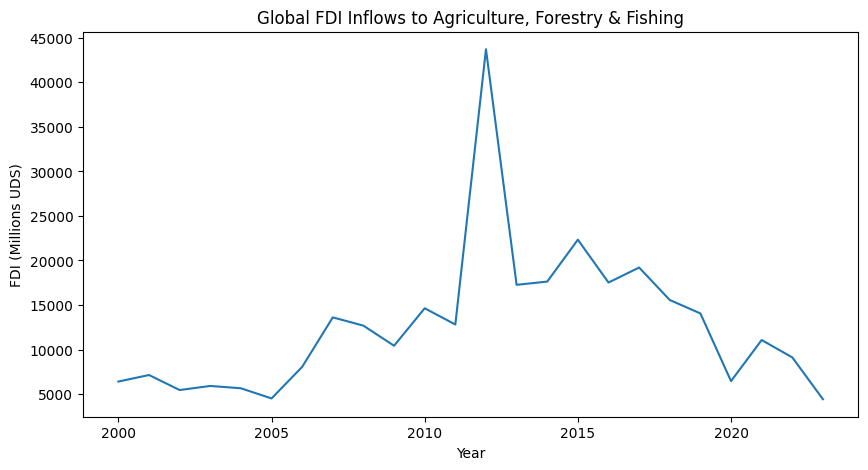

In [14]:
# Global trends over time
# Aggregate global FDI by year
global_trend = df_clean.groupby("Year")["FDI_Millions_USD"].sum()

plt.figure(figsize=(10, 5))
plt.plot(global_trend.index, global_trend.values)
plt.title("Global FDI Inflows to Agriculture, Forestry & Fishing")
plt.xlabel("Year")
plt.ylabel("FDI (Millions UDS)")
plt.show()

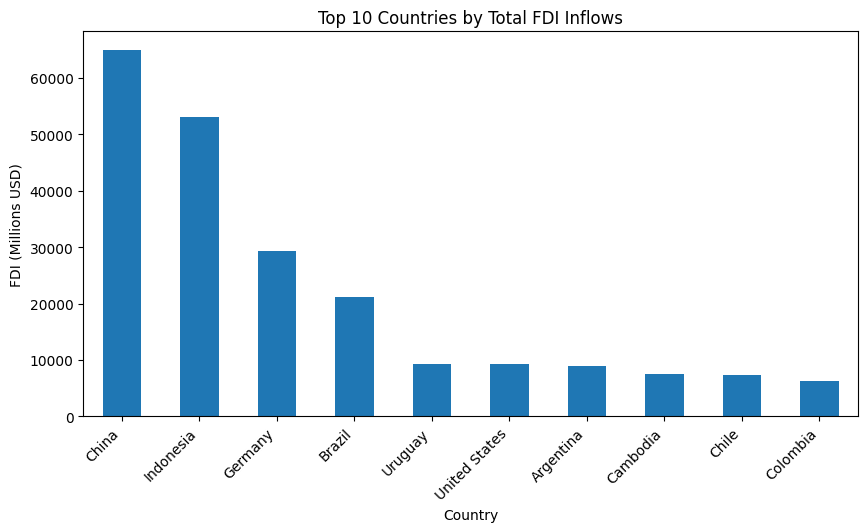

In [17]:
# Top 10 countries by total FDI
top_countries = (df_clean.groupby("Country")["FDI_Millions_USD"]
                 .sum()
                 .sort_values(ascending=False)
                 .head(10)
                )

plt.figure(figsize=(10, 5))
top_countries.plot(kind="bar")
plt.title("Top 10 Countries by Total FDI Inflows")
plt.xlabel("Country")
plt.ylabel("FDI (Millions USD)")
plt.xticks(rotation=45, ha="right")
plt.show()

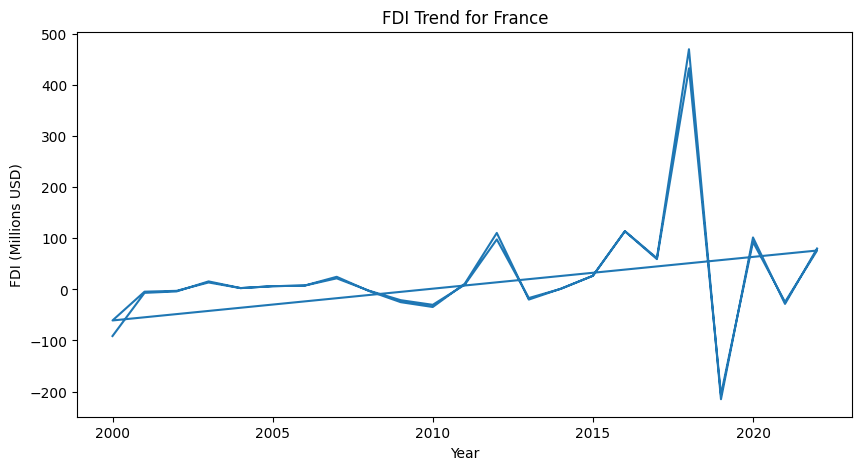

In [22]:
# Country-level trade example
country_example = "France" # Example country analysis
country_data = df_clean[df_clean["Country"] == country_example]

plt.figure(figsize=(10, 5))
plt.plot(country_data["Year"], country_data["FDI_Millions_USD"])
plt.title(f"FDI Trend for {country_example}")
plt.xlabel("Year")
plt.ylabel("FDI (Millions USD)")
plt.show()

## Key Insights
- Global agriculture FDI shows cyclical behaviour, often aligned with global economic conditions.
- A small number of countries account for disproportionately large share of total inflows.
- Country-level trends vary significantly, highlighting differing investment climates and policies.

## Machine Learning: Simple Forcasting Model
Goal: Predict FDI inflows based on time (year) for a single country.

In [23]:
# Preparing data for ML (single country)
ml_data = country_data[["Year", "FDI_Millions_USD"]]

X = ml_data[["Year"]]
y = ml_data[["FDI_Millions_USD"]]

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(22080.939539848547, -0.13555433940775607)

# Interpretation:
- This simple model is primairly illustrative.
- Linear trends are often insufficient for economic time series.
- Demonstrates ML workflow rather than production-grade forcasting.

## Limitations:
- FDI is influenced by many external factors not captured here.
- Linear regression oversimplifies temporal dynamics.
- Missing macroeconomic and policy variables.

## Conclusion
This project demonstrates amd end-to-end data science workflow using piblic World Bank Data. It highlights the ability to:
- Clean and structure complex dataset.
- Perform exploratory and visual analysis.
- Communicate insights clearly.
- Apply basic machine-learning techniques.